#**Step1: Access data via CDS API**
The Climate Data Store (CDS) FROM Copernicus Application Program Interface (API) is a service providing programmatic access to CDS data.The CDS API client is a python based library. It provides support for both Python 2.7.x and Python 3. https://cds.climate.copernicus.eu/api-how-to

In [44]:
#You can Install the CDS API client via the package management system pip
!pip3 install cdsapi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


####**Use the CDS API client for data access**
Install the CDS API key, If you don't have an account, please self register at the [CDS registration page](https://cds.climate.copernicus.eu/user/register?destination=%2F%23!%2Fhome) and go to the steps below.

In [45]:
#please register at the CDS registration page so you get a key
url = 'url: https://cds.climate.copernicus.eu/api/v2'
key= 'insert your key'

This data set provides complete historical reconstruction of meteorological conditions favourable to the start, spread and sustainability of fires. The fire danger metrics provided are part of a vast dataset produced by the Copernicus Emergency Management Service for the European Forest Fire Information System (EFFIS). [Fire danger indices historical data](https://cds.climate.copernicus.eu/cdsapp#!/dataset/cems-fire-historical?tab=overview)
The api call must follow the syntax:

In [46]:
#get API request from the dataset
import cdsapi

c = cdsapi.Client(url = 'https://cds.climate.copernicus.eu/api/v2',
key= 'insert your key')

c.retrieve(
    'cems-fire-historical',
    {
        'format': 'zip',
        'product_type': 'reanalysis',
        'variable': 'fire_weather_index',
        'version': '4.0',
        'dataset': 'Consolidated dataset',
        'year': [
            '2014','2016','2022',
        ],
        'month': '04',
        'day': [
            '10', '16', '20',
        ],
    },
    '/content/download.zip')

2023-06-26 12:23:33,627 INFO Welcome to the CDS
INFO:cdsapi:Welcome to the CDS
2023-06-26 12:23:33,630 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/cems-fire-historical
INFO:cdsapi:Sending request to https://cds.climate.copernicus.eu/api/v2/resources/cems-fire-historical
2023-06-26 12:23:34,035 INFO Request is completed
INFO:cdsapi:Request is completed
2023-06-26 12:23:34,040 INFO Downloading https://download-0021.copernicus-climate.eu/cache-compute-0021/cache/data8/dataset-cems-fire-historical-d141642f-6892-472e-8ee1-df8bdbd32452.zip to /content/download.zip (6.1M)
INFO:cdsapi:Downloading https://download-0021.copernicus-climate.eu/cache-compute-0021/cache/data8/dataset-cems-fire-historical-d141642f-6892-472e-8ee1-df8bdbd32452.zip to /content/download.zip (6.1M)
2023-06-26 12:23:36,528 INFO Download rate 2.5M/s
INFO:cdsapi:Download rate 2.5M/s


Result(content_length=6418658,content_type=application/zip,location=https://download-0021.copernicus-climate.eu/cache-compute-0021/cache/data8/dataset-cems-fire-historical-d141642f-6892-472e-8ee1-df8bdbd32452.zip)

In [47]:
#extract the zipfile
import zipfile
with zipfile.ZipFile("/content/download.zip", 'r') as zip_ref:
    zip_ref.extractall("/content")

#**Step2: Working with Xarray**
This assignment I use Xarray for handling real world climate data in form of NetCDF format. Xarray is an Python Library for performing multidimensional data analysis, handling geospatial coordinates, time series and among other dimensions. NetCDF file format provides xarray with a natural and portable serialization format. NetCDF is very popular in the geosciences, and there are existing libraries for reading and writing netCDF in many programming languages, including Python. [Xarray Document](https://docs.xarray.dev/en/stable/getting-started-guide/why-xarray.html)

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

##**Function1: open NetCDF dataset**
Open_dataset method is used to open NetCDF file which is Fire danger indices.

In [58]:
def open_netcdf(netcdf):
    """
    open fire historical data from a downloaded NetCDF file.

    Args:
        netcdf path (str): A file path.

    Returns:
        Fire danger indices historical data in form of 3 dimensional xarray dataset; time, lat, lon.
    """
    netcdf = '/content/ECMWF_FWI_FWI_20140410_1200_hr_v4.0_con.nc'
    f = xr.open_dataset(netcdf)
    return f
netcdf = '/content/ECMWF_FWI_FWI_20140410_1200_hr_v4.0_con.nc'
f = xr.open_dataset(netcdf)
open_netcdf.__doc__


'\n    open fire historical data from a downloaded NetCDF file.\n\n    Args:\n        netcdf path (str): A file path.\n\n    Returns:\n        Fire danger indices historical data in form of 3 dimensional xarray dataset; time, lat, lon.\n    '

In [50]:
#print data array
f

<xarray.Dataset>
Dimensions:    (time: 1, longitude: 1440, latitude: 721)
Coordinates:
  * time       (time) datetime64[ns] 2014-04-10T12:00:00
  * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
  * latitude   (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
Data variables:
    fwi        (time, latitude, longitude) float32 ...
Attributes:
    CDI:                       Climate Data Interface version 1.9.8 (https://...
    Conventions:               CF-1.6
    history:                   Sat Jul 31 11:52:43 2021: cdo -f nc4 -chname,f...
    institution:               European Centre for Medium-Range Weather Forec...
    cdo_openmp_thread_number:  8
    CDO:                       Climate Data Operators version 1.9.8 (https://...

In [51]:
# General info on the data
f.info

# Get the list of variables
f.data_vars

# Get the list of dimensions
f.coords

# Get info on one specific variable (here thetao)
f.fwi

# Get info on dimensions
f.time, f.latitude, f.longitude

(<xarray.DataArray 'time' (time: 1)>
 array(['2014-04-10T12:00:00.000000000'], dtype='datetime64[ns]')
 Coordinates:
   * time     (time) datetime64[ns] 2014-04-10T12:00:00
 Attributes:
     standard_name:  time
     axis:           T,
 <xarray.DataArray 'latitude' (latitude: 721)>
 array([ 90.  ,  89.75,  89.5 , ..., -89.5 , -89.75, -90.  ], dtype=float32)
 Coordinates:
   * latitude  (latitude) float32 90.0 89.75 89.5 89.25 ... -89.5 -89.75 -90.0
 Attributes:
     standard_name:  latitude
     long_name:      latitude
     units:          degrees_north
     axis:           Y,
 <xarray.DataArray 'longitude' (longitude: 1440)>
 array([0.0000e+00, 2.5000e-01, 5.0000e-01, ..., 3.5925e+02, 3.5950e+02,
        3.5975e+02], dtype=float32)
 Coordinates:
   * longitude  (longitude) float32 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
 Attributes:
     standard_name:  longitude
     long_name:      longitude
     units:          degrees_east
     axis:           X)

##**Function2: Select data variable and timestep**
Select the point of time together with a fire data. In this data there is only 1 data variable which is "fwi" (Fire weather index)

In [57]:
def select_data(variable, timestep):
    """
    Filter data variable and timestep in Xarray.

    Args:
        variable (str): represent the main data of interest in a dataset.
        timestep (str): represent time.

    Returns:
        The Fire data with timestep according to selected data.
    """
    subset = f[variable].sel(time = slice(timestep))
    return subset

#in this case I choose "fwi" data and "10 April 2014"
subset = f["fwi"].sel(time = slice("2014-04-10"))
subset
select_data.__doc__

'\n    Filter data variable and timestep in Xarray.\n\n    Args:\n        variable (str): represent the main data of interest in a dataset.\n        timestep (str): represent time.\n\n    Returns:\n        The Fire data with timestep according to selected data.\n    '

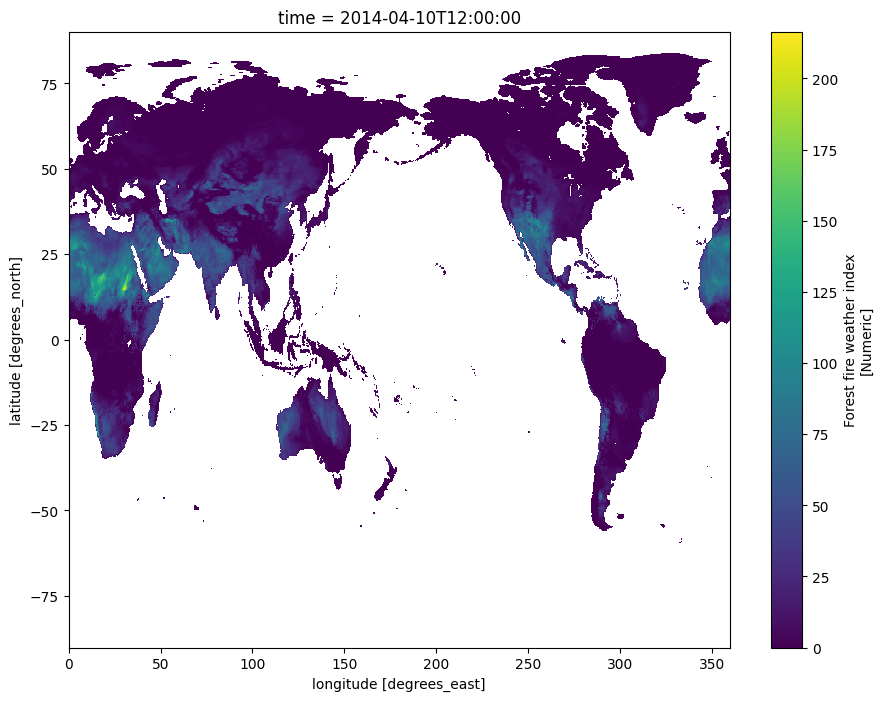

In [53]:
## Plot
subset.plot(size = 8)

plt.show()

The map shows how Forest weather index distributes entire the world in 2014.

##**Function3: select time and longitude**
Select the point of time together along longitude. It allows you to select any longitude and also included nearest longitude for you if the longitude that you indicate does not have data.


'\n    Calls xarray plotting function based on the dimensions of the squeezed DataArray.\n\n    Args:\n        timeindex (int): represent given index in the timestep list.\n        lon (int): represent longitude.\n\n    Returns:\n        The Fire danger index graph in each Latitude according to selected timestep and longitude.\n    '

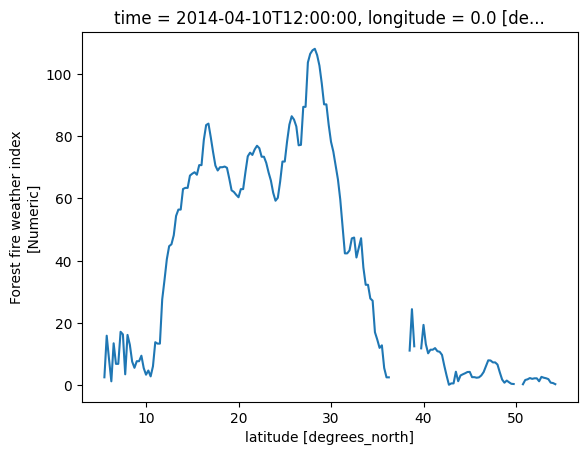

In [54]:
def plot_NetCDFdata(timeindex, lon):
    """
    Calls xarray plotting function based on the dimensions of the squeezed DataArray.

    Args:
        timeindex (int): represent given index in the timestep list.
        lon (int): represent longitude.

    Returns:
        The Fire danger index graph in each Latitude according to selected timestep and longitude.
    """
    return subset.isel(time=timeindex).sel(longitude=lon, method='nearest').plot()

#in this case I choose longitude -60
subset.isel(time=0).sel(longitude=-60, method='nearest').plot()
plot_NetCDFdata.__doc__

The graph shows how forest fire index changes according to the latitude. You can see that there is an high point around latitude 30. So this is a way how to visualize geospatial NetCDF data.

In [55]:
#summarize mean value of this selected data
meanfire = subset.mean()
meanfire

<xarray.DataArray 'fwi' ()>
array(14.251976, dtype=float32)

In [56]:
#you can convert data to dataframe to see all the data as a table
df = f.to_dataframe()
df

fwi
time                longitude latitude     
2014-04-10 12:00:00 0.00       90.00    NaN
                               89.75    NaN
                               89.50    NaN
                               89.25    NaN
                               89.00    NaN
...                                     ...
                    359.75    -89.00    NaN
                              -89.25    NaN
                              -89.50    NaN
                              -89.75    NaN
                              -90.00    NaN

[1038240 rows x 1 columns]